In [1]:
%%time

import os
import glob

# Define the root directory 
root_directory = '/kaggle/input/ravdess-emotional-speech-audio/'

# List to store paths of all .wav files
all_wav_files = []

# Iterate over each actor directory
for actor_dir in os.listdir(root_directory):
    actor_path = os.path.join(root_directory, actor_dir)
    
    # Check if the path is a directory 
    if os.path.isdir(actor_path):
        # Find all .wav files in the current actor's directory
        wav_files = glob.glob(os.path.join(actor_path, '*.wav'))
        
        # Add these .wav file paths to the main list
        all_wav_files.extend(wav_files)

# Print the total number of wav files found
print(f"Total number of .wav files found: {len(all_wav_files)}")

Total number of .wav files found: 1440
CPU times: user 4.25 ms, sys: 13 ms, total: 17.3 ms
Wall time: 451 ms


# Detect Noise 

In [2]:
%%time

import os
import librosa
import numpy as np

# Define the root directory 
root_directory = '/kaggle/input/ravdess-emotional-speech-audio/'

# List to store paths of all .wav files
all_wav_files = []

# Iterate over each actor directory and find all .wav files
for actor_dir in os.listdir(root_directory):
    actor_path = os.path.join(root_directory, actor_dir)
    if os.path.isdir(actor_path):
        wav_files = glob.glob(os.path.join(actor_path, '*.wav'))
        all_wav_files.extend(wav_files)

# Function to calculate the Signal-to-Noise Ratio (SNR)
def calculate_snr(y):
    # Calculate the mean of the signal (to estimate noise)
    mean_signal = np.mean(y)
    # Calculate the standard deviation (to estimate the noise power)
    std_signal = np.std(y)
    
    # Avoid division by zero
    if std_signal == 0:
        return 0
    
    # Calculate SNR as the ratio of mean signal to standard deviation (in dB)
    snr = 20 * np.log10(abs(mean_signal / std_signal))
    return snr

# Analyze each audio file and detect noise level
for file in all_wav_files:
    # Load the audio file
    y, sr = librosa.load(file, sr=None)
    
    # Calculate SNR
    snr = calculate_snr(y)
    
    # Determine if the audio is noisy based on SNR threshold
    noise_threshold = 10  # Lower values indicate higher noise
    if snr < noise_threshold:
        noise_status = "Noisy"
    else:
        noise_status = "Clean"
    
    print(f"File: {file} - SNR: {snr:.2f} dB - Status: {noise_status}")

print("Noise detection completed.")

File: /kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav - SNR: -99.53 dB - Status: Noisy
File: /kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav - SNR: -88.99 dB - Status: Noisy
File: /kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-02-01-02-02.wav - SNR: -98.95 dB - Status: Noisy
File: /kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-01-02-02.wav - SNR: -80.75 dB - Status: Noisy
File: /kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav - SNR: -88.20 dB - Status: Noisy
File: /kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-06-02-02-01-02.wav - SNR: -97.35 dB - Status: Noisy
File: /kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-04-01-02-01-02.wav - SNR: -68.30 dB - Status: Noisy
File: /kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-02-02.wav - SNR: -92.65 dB - Status: Noisy
File: /kaggle/input/ravdess-emotional-speech-audio/Actor

# Clean Noise

In [3]:
%%time

import os
import glob
import librosa
import numpy as np
from scipy.io.wavfile import write

# Define the root directory 
root_directory = '/kaggle/input/ravdess-emotional-speech-audio/'
output_directory = '/kaggle/working/cleaned_audio/'  # Directory to save cleaned files

# Ensure the output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# List to store paths of all .wav files
all_wav_files = []

# Iterate over each actor directory and find all .wav files
for actor_dir in os.listdir(root_directory):
    actor_path = os.path.join(root_directory, actor_dir)
    if os.path.isdir(actor_path):
        wav_files = glob.glob(os.path.join(actor_path, '*.wav'))
        all_wav_files.extend(wav_files)

# Function to remove noise from an audio file using HPSS
def remove_noise(audio_data, sr):
    # Use Harmonic-Percussive Source Separation to remove background noise
    y_harmonic, y_percussive = librosa.effects.hpss(audio_data)
    # Return only the harmonic component to reduce noise
    return y_harmonic

# Process each audio file, remove noise, and save the cleaned audio
for file_path in all_wav_files:
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Remove noise using HPSS
    y_cleaned = remove_noise(y, sr)
    
    # Normalize audio before saving
    y_cleaned_normalized = librosa.util.normalize(y_cleaned)
    
    # Define the output path for the cleaned file
    cleaned_file_path = os.path.join(output_directory, os.path.basename(file_path))
    
    # Save the cleaned audio 
    write(cleaned_file_path, sr, (y_cleaned_normalized * 32767).astype(np.int16))
    
    print(f"Cleaned file saved to: {cleaned_file_path}")

print("All files have been processed and saved to the cleaned_audio directory.")

Cleaned file saved to: /kaggle/working/cleaned_audio/03-01-08-01-01-01-02.wav
Cleaned file saved to: /kaggle/working/cleaned_audio/03-01-01-01-01-01-02.wav
Cleaned file saved to: /kaggle/working/cleaned_audio/03-01-07-02-01-02-02.wav
Cleaned file saved to: /kaggle/working/cleaned_audio/03-01-07-01-01-02-02.wav
Cleaned file saved to: /kaggle/working/cleaned_audio/03-01-01-01-02-01-02.wav
Cleaned file saved to: /kaggle/working/cleaned_audio/03-01-06-02-02-01-02.wav
Cleaned file saved to: /kaggle/working/cleaned_audio/03-01-04-01-02-01-02.wav
Cleaned file saved to: /kaggle/working/cleaned_audio/03-01-01-01-01-02-02.wav
Cleaned file saved to: /kaggle/working/cleaned_audio/03-01-02-01-01-02-02.wav
Cleaned file saved to: /kaggle/working/cleaned_audio/03-01-03-01-01-01-02.wav
Cleaned file saved to: /kaggle/working/cleaned_audio/03-01-07-01-02-02-02.wav
Cleaned file saved to: /kaggle/working/cleaned_audio/03-01-05-01-01-02-02.wav
Cleaned file saved to: /kaggle/working/cleaned_audio/03-01-03-01

Processing audio files...
Processed: 03-01-07-01-02-02-01.wav - Class: Silence - Confidence: 0.392
Processed: 03-01-07-02-02-01-03.wav - Class: Roaring cats (lions, tigers) - Confidence: 0.117
Processed: 03-01-02-01-02-02-09.wav - Class: Silence - Confidence: 0.386
Processed: 03-01-02-02-02-02-06.wav - Class: Music - Confidence: 0.288
Processed: 03-01-08-02-02-02-01.wav - Class: Silence - Confidence: 0.503
Processed: 03-01-08-01-02-01-18.wav - Class: Silence - Confidence: 0.433
Processed: 03-01-07-01-02-02-04.wav - Class: Silence - Confidence: 0.436
Processed: 03-01-08-01-02-02-18.wav - Class: Silence - Confidence: 0.430
Processed: 03-01-05-01-01-01-01.wav - Class: Silence - Confidence: 0.452
Processed: 03-01-02-02-01-01-05.wav - Class: Silence - Confidence: 0.299
Processed: 03-01-02-02-01-01-18.wav - Class: Silence - Confidence: 0.455
Processed: 03-01-08-01-01-02-18.wav - Class: Silence - Confidence: 0.430
Processed: 03-01-06-02-02-01-04.wav - Class: Silence - Confidence: 0.500
Proces

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


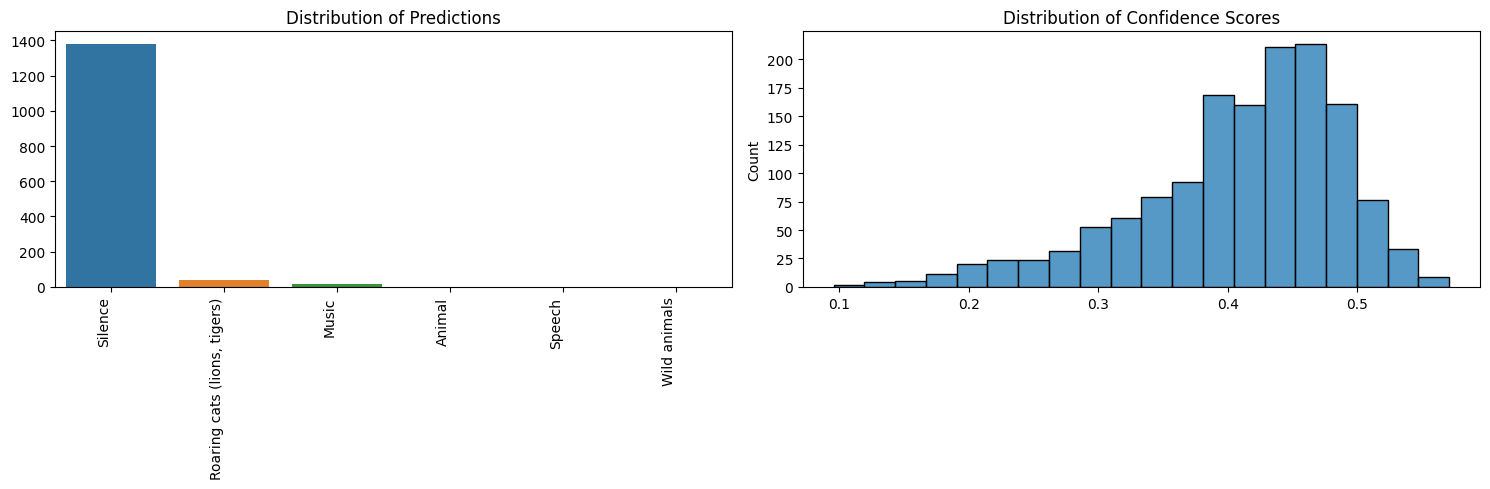

CPU times: user 18.2 s, sys: 1.24 s, total: 19.4 s
Wall time: 19.9 s


In [10]:
%%time

import os
import librosa
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import io
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the YAMNet model from TensorFlow Hub
yamnet_model = hub.load('https://www.kaggle.com/models/google/yamnet/TensorFlow2/yamnet/1')

# Function to extract class names from the model's class_map_path
def class_names_from_csv(class_map_csv_text):
    """Returns list of class names corresponding to score vector."""
    class_map_csv = io.StringIO(class_map_csv_text)
    # Skip the header
    csv_reader = csv.reader(class_map_csv)
    next(csv_reader)
    class_names = [display_name for (class_index, mid, display_name) in csv_reader]
    return class_names

# Load class names from the model's class_map_path
class_map_path = yamnet_model.class_map_path().numpy()
class_names = class_names_from_csv(tf.io.read_file(class_map_path).numpy().decode('utf-8'))

# Preprocess the audio to be compatible with YAMNet
def preprocess_audio(audio_file_path, target_sr=48000):
    try:
        # Load and resample audio 
        waveform, sr = librosa.load(audio_file_path, sr=target_sr)
        
        # Ensure minimum duration (1 second)
        if len(waveform) < target_sr:
            waveform = np.pad(waveform, (0, target_sr - len(waveform)))
        
        return waveform
        
    except Exception as e:
        print(f"Error processing {audio_file_path}: {str(e)}")
        return None

# Classify the audio file using YAMNet
def classify_audio_file(audio_file_path):
    try:
        waveform = preprocess_audio(audio_file_path, target_sr=48000)
        if waveform is None:
            return None, None
        
        scores, embeddings, spectrogram = yamnet_model(waveform)
        
        class_scores = scores.numpy().mean(axis=0)
        predicted_class_idx = np.argmax(class_scores)
        confidence_score = class_scores[predicted_class_idx]
        
        predicted_class = class_names[predicted_class_idx]
        
        return predicted_class, confidence_score
        
    except Exception as e:
        print(f"Error classifying {audio_file_path}: {str(e)}")
        return None, None

# Process the directory containing audio files
def process_audio_directory(audio_directory, limit=None):
    results = []
    
    for root, dirs, files in os.walk(audio_directory):
        for audio_file in files:
            if audio_file.lower().endswith('.wav'):
                audio_file_path = os.path.join(root, audio_file)
                predicted_class, confidence = classify_audio_file(audio_file_path)
                
                if predicted_class is not None:
                    results.append((audio_file, predicted_class, confidence))
                    print(f"Processed: {audio_file} - Class: {predicted_class} - Confidence: {confidence:.3f}")
                
                if limit and len(results) >= limit:
                    return results
    
    return results

# Plot classification results
def plot_results(results):
    if not results:
        print("No results to plot.")
        return
    
    predictions = [r[1] for r in results]
    confidences = [r[2] for r in results]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    pred_counts = pd.Series(predictions).value_counts()
    sns.barplot(x=pred_counts.index, y=pred_counts.values)
    plt.xticks(rotation=90, ha='right')
    plt.title('Distribution of Predictions')
    
    plt.subplot(1, 2, 2)
    sns.histplot(confidences, bins=20)
    plt.title('Distribution of Confidence Scores')
    
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Directory containing the cleaned audio files
    audio_directory = '/kaggle/working/cleaned_audio'
    
    # Process audio files
    print("Processing audio files...")
    results = process_audio_directory(audio_directory)
    
    # Create DataFrame for results and save to CSV
    if results:
        df_results = pd.DataFrame(results, columns=['filename', 'prediction', 'confidence'])
    
        # Save the results to a CSV file
        output_csv_path = '/kaggle/working/classification_results.csv'
        df_results.to_csv(output_csv_path, index=False)
        print(f"\nResults saved to: {output_csv_path}")
    
        # Print summary statistics
        print("\nSummary Statistics:")
        print("-" * 50)
        print(f"Total files processed: {len(df_results)}")
        print("\nPrediction counts:")
        print(df_results['prediction'].value_counts().head())
        print("\nConfidence score statistics:")
        print(df_results['confidence'].describe())
        
        # Plot the results
        plot_results(results)
    else:
        print("No audio files processed successfully.")

# Cluster Method

In [2]:
%%time

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a DataFrame
file_path = '/kaggle/input/emotion/classification_results.csv'
df = pd.read_csv(file_path)

# Convert 'prediction' to numeric values for clustering
df['prediction'] = pd.factorize(df['prediction'])[0]

# Extract features for clustering
features = df[['prediction', 'confidence']]

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering with 3 clusters (Silence, Noise, Normal)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

CPU times: user 143 ms, sys: 23.1 ms, total: 166 ms
Wall time: 127 ms


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
%%time

# Map the cluster labels to "Silence", "Noisy", and "Normal"

cluster_mapping = {
    0: 'Silence',
    1: 'Noisy',
    2: 'Normal'
}

# Map the cluster labels to "Silence", "Noisy", and "Normal"
df['emotion_category'] = df['cluster'].map(cluster_mapping)

CPU times: user 1.9 ms, sys: 0 ns, total: 1.9 ms
Wall time: 2.85 ms


In [4]:
%%time

df['emotion_category'].value_counts()

CPU times: user 1.26 ms, sys: 1.9 ms, total: 3.16 ms
Wall time: 5.05 ms


emotion_category
Silence    1021
Normal      365
Noisy        54
Name: count, dtype: int64

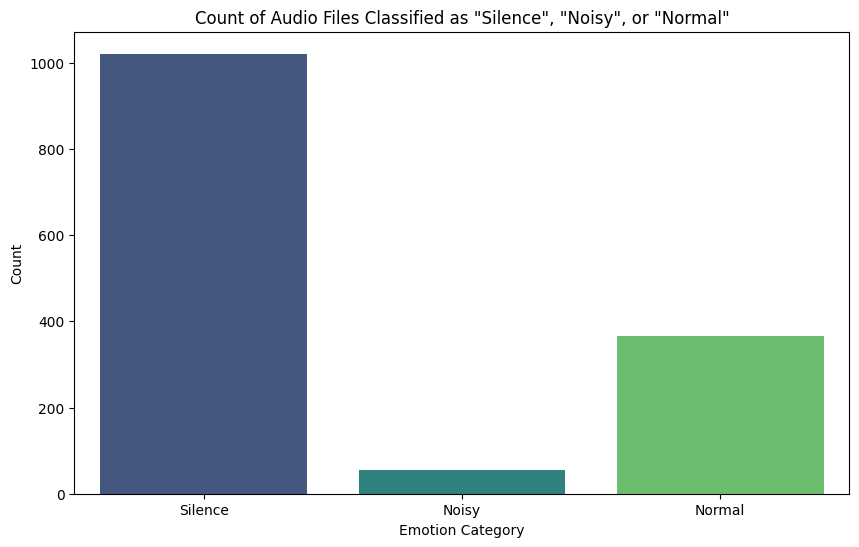

CPU times: user 362 ms, sys: 177 ms, total: 539 ms
Wall time: 289 ms


In [5]:
%%time

# Plot a bar chart of the emotion category counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='emotion_category', palette='viridis')
plt.title('Count of Audio Files Classified as "Silence", "Noisy", or "Normal"')
plt.xlabel('Emotion Category')
plt.ylabel('Count')
plt.show()

* The audio is mostly silence.

In [6]:
%%time

# Save the results to a new CSV file
output_csv_path = '/kaggle/working/classification_with_emotion_labels.csv'
df.to_csv(output_csv_path, index=False)
print(f"Results with emotion labels saved to: {output_csv_path}")

Results with emotion labels saved to: /kaggle/working/classification_with_emotion_labels.csv
CPU times: user 9.28 ms, sys: 867 µs, total: 10.1 ms
Wall time: 10.3 ms


Accuracy: 1.00


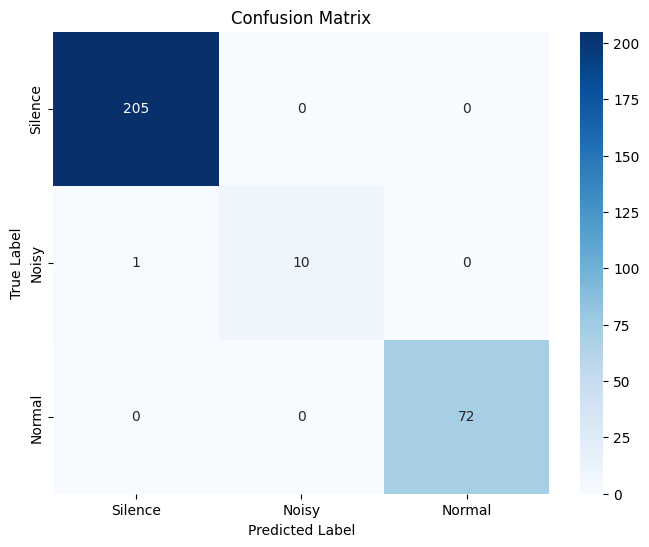

CPU times: user 693 ms, sys: 175 ms, total: 868 ms
Wall time: 599 ms


In [10]:
%%time

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = '/kaggle/working/classification_with_emotion_labels.csv'
df = pd.read_csv(file_path)

# Prepare the features and labels
# Convert 'emotion_category' to numerical values for training
df['emotion_category'] = pd.factorize(df['emotion_category'])[0]

# Extract features and labels
X = df[['prediction', 'confidence']]  # Feature columns
y = df['emotion_category']            # Label column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Silence', 'Noisy', 'Normal'], 
            yticklabels=['Silence', 'Noisy', 'Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

* Dark blue represents correctly classified silence, noisy, normal

* Light blue represents misclassified samples.